<a href="https://colab.research.google.com/github/ulumbagas/Sentimen-Analysis/blob/main/Alun-alun%20Jombang/sentimen_Alun_alun_Jombang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis sentimen Alun-alun Jombang

## Import library

In [1]:
#jangan pakai ulasan_clean_stopword coba pakai ulasan_clean
!pip install indoNLP
!pip install nlp-id

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.5/561.5 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 25.4 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=8dfceb08a2057bd42c74a1231b8701bdfe3e58b8205025a5926b8659e380fe98
  Stored in directory: /root/.cache/pip/wheels/01/46/3b/e29ffbe4ebe614ff224bad40fc6a5773a67a163251585a13a9
Successfully built wget
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.36.0
    Uninstalling huggingface-hub-0.36.0:


In [2]:
import re
import random
import pandas as pd
from tqdm import tqdm
from nlp_id.lemmatizer import Lemmatizer
from nlp_id.stopword import StopWord
from indoNLP.preprocessing import pipeline, replace_word_elongation, replace_slang
from transformers import pipeline as hf_pipeline

pd.set_option('display.max_colwidth', None)

## Load Dataset

In [3]:
path_data='/content/drive/MyDrive/Hugging Face/alun-alun jombang/alun_alun_jombang_reviews_googlemaps.csv'
df = pd.read_csv(path_data).drop_duplicates()
print("Shape dataset:", df.shape)

Shape dataset: (2120, 2)


## Data Cleaning & Preprocessing

## Normalisasi

In [4]:
def clean_review(text: str) -> str:
    """Lowercase, remove emoji/simbol non-ASCII, dan spasi berlebihan"""
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = text.encode("ascii", "ignore").decode("ascii")  # remove emoji/simbol
    text = re.sub(r"[^a-zA-Z0-9\s]", " ", text)            # keep alphanumeric
    return re.sub(r"\s+", " ", text).strip()

In [5]:
norm = {
    " gk ": " tidak ",
    'aloon ':'alunalun',
    "jd ":"jadi ",
    " ga ": " tidak ",
    " gak ": " tidak ",
    " g ":" tidak ",
    " nggak ": " tidak ",
    " jg ": " juga ",
    " tp ": " tapi ",
    " krn ": " karena ",
    " sm ": " sama ",
    " dg ": " dengan ",
    " dgn ": " dengan ",
    " aja ": " saja ",
    " udh ": " sudah ",
    " blm ": " belum ",
    " skrg ": " sekarang ",
    ' umntuk':' untuk',
    ' krg':' kurang',
    " trs ": " terus ",
    " bgt ": " banget ",
    " bnyk ": " banyak ",
    " tmpt ": " tempat ",
    " kl ": " kalau ",
    " klo ": " kalau ",
    " sy ": " saya ",
    " aq ": " saya ",
    " gue ": " saya ",
    " gua ": " saya ",
    " km ": " kamu ",
    " lu ": " kamu ",
    " ok ": " baik ",
    " oke ": " baik ",
    " sip ": " baik ",
    " d " : " di ",
    "krn ":"karena ",
    " rekomen ": " rekomendasi ",
    " recommended ": " rekomendasi ",
    'many pigeons flying':'banyak merpati terbang',
    "alun alun":"alunalun",
    "yg ": "yang ",
    "skrg ": "sekarang ",
    "alun2 ":"alunalun ",
    "alon2": "alunalun",
    "jalan2 ": "jalan jalan ",
    "spot ":"tempat ",
    "utk ":"untuk ",
    "deket ":"dekat ",
    "enk": "enak ",
    "public place": "tempat umum ",
    "dsb ": "dan sebagainya ",
    'rame ': 'ramai ',
    'krg ': 'kurang ',
    ' unt ': ' untuk ',
    ' tdk ': ' tidak ',
    'anak2 ':'anakanak ',
    'anak-anak':'anakanak',
    'anak anak': 'anakanak',
    ' n ': ' dan ',
    ' sampah2 ': ' sampah ',
    ' dr ': ' dari ',
    ' klo ': ' kalau ',
    ' ayh ': ' ayah ',
    ' dprsiapkan ': ' dipersiapkan ',
    ' orang2 ':' orang orang ',
    'sak jane ': ' sebenarnya ',
    'percis ': 'persis ',
    'sdh ': 'sudah ',
    'org ': 'orang ',
    'wkwk':'',
    'wort it ':'cukup baik ',
    'worth it ':'cukup baik ',
    'poll':'',
    'jbg':'jombang',
    'cepet ':'cepat ',
    'tmpat':'tempat',
    'emg ' : 'memang ',
    'bgt ' : 'sekali ',
    'temen ': 'teman ',
    'banget ': 'sekali  ',
    'bnngeeett': 'sekali',
    'seruuuuu': 'seru',
    'bbrp':'beberapa',
    'icon': 'ikon',
    'happy': 'bahagia',
    'overall': 'secara umum',
    'love u': 'aku suka',
    'weekend': 'akhir minggu',
    'alon alon': 'alunalun',
    'remang2':'remang remang',
    'temen2':'teman teman',
    'ngga ': 'tidak ',
    'enak2': 'enak',
    'kota2': 'kota',
    'play ground':"tempat bermain",
    'playgrond': "tempat bermain",
    'play ground': "tempat bermain",
    'playground':'tempat bermain',
    'bareng': 'bersama',
    'puaaanas': 'panas',
    'nyangkruk': 'berkumpul',
    'jombanng':'jombang',
    'sore2':'sore',
    ' jl ': ' jalan ',
    'hangout': 'jalan-jalan bersama',
    'laper ': 'lapar ',
    'enggak ': 'tidak ',
    ' city ':' kota ',
    'ruame ':'ramai ',
    'rame':'ramai',
    'makananx ': 'makanannya ',
    'free ':'gratis ',
    'entrance ': 'masuk ',
    'mkanan ': 'makanan ',
    'bagus2':'bagus',
    'alun alunnya':'alunalun',
    'alun2nya':'alunalun',
    'first waktu':'pertama kali',
    'alun2nya':'alunalun',
    'tpat ':'tempat ',
    'cangtip':'cantik',
    'indak ':'tidak ',
    'kumpul2':'berkumpul',
    'tyap ':'setiap ',
    'alun alunya':'alunalun',
    'taman2 ':'taman ',
    'alunalunya ':'alunalun ',
    'buangeeetttt':'sekali',
    'panaaaaaaassss':'panas',
    'santai2 ':'santai ',
    'pagi2 ':'pagi ',
    'nice place':'tempat bagus',
    'jooos men':'bagus sekali',
    'sebrang ':'seberang',
    'nganter ':'mengantar ',
    'apik ':'bagus ',
    'car free day':'hari bebas kendaraan bermotor',
    'alun2':'alunalun',
    'momong':'mengasuh',
    'asyk ':'asyik ',
    'pusat2':'pusat',
    'panas2 ':'panas ',
    'jauh2 ':'jauh',
    'teleknya ':'kotorannya ',
    'hbos ': 'habis ',
    'hlan halan ':'jalan jalan ',
    'keceh ':'keren ',
    'jomabng ':'jombang ',
    'pisan ':'sekali ',
    'unuk ':'untuk ',
    ' mbuat ':' membuat ',
    " mjadi ":" menjadi ",
    'baguus': 'bagus',
    'kids friendly':'ramah anak',
    'child friendly':'ramah anak',
    " layan ":'',
    'bocil':'anak',
    'jualana':'jualan',
    'banwa':'membawa',
    'smpah ':'sampah ',
    'smbarangan ':'sembarangan ',
    'ngemong ':'mengasuh',
    'playdtound':'taman bermain',
    'playgorund ':'taman bermain ',
    'malming ':'malam minggu ',
    'moga ':'semoga ',
    'nyantai ':'bersantai ',
    'xlo ':'kalau ',
    'quality time':'waktu yang berkualitas',
    'berhati2': 'hati-hati',
    'direnov ':'direnovasi',
    'family':'keluarga',
    'wig end':'akhir minggu',
    'week end':'akhir minggu',
    'nice ':'bagus ',
    'rekomended ':'Direkomendasikan ',
    'brtugas ':'bertugas ',
    'kalo ':'kalau ',
    'pulkam ':'pulang kampung '

}

def normalisai(text: str, norm_dict: dict) -> str:
    for k, v in norm_dict.items():
        text = text.replace(k, v)
    return text

In [6]:
# Normalisasi slang dari CSV GitHub
slang_url='https://raw.githubusercontent.com/adeariniputri/text-preprocesing/master/slang.csv'

slang = pd.read_csv(slang_url)
slang_dict = dict(zip(" " + slang["slang"] + " ", " " + slang["formal"] + " "))


In [7]:
# Word elongation & slang indoNLP
def normalize_slang_elong(text: str) -> str:
    pipe = pipeline([replace_word_elongation, replace_slang])
    return pipe(text)

In [8]:
# =======================
# Preprocessing Pipeline
# =======================
df["ulasan_clean"] = (
    df["ulasan"]
    .apply(clean_review)
    .apply(lambda x: normalisai(x, norm))
    .apply(lambda x: normalisai(x, slang_dict))
    .apply(normalize_slang_elong)
)

In [9]:
#random cek
import random
random_number = random.randint(1, len(df))
df[['ulasan','ulasan_clean']][random_number:(random_number+50)]

,ulasan,ulasan_clean
197,Alun alun yg sekarang beda dengan dulu. Sekarang lebih aman. Ga ada pengamen. Pas kesana sore jadi pas rame anak2 pada main.,alunalun yang sekarang beda dengan dulu sekarang lebih aman tidak ada pengamen pas kesana sore jadi pas ramai anakanak pada main
198,"alun-alun jombang yang terletak berdekatan dengan pendopo dan masjid agung, memiliki nuasa sebagai tempat berlibur buat anak kecil sampai orang tua",alunalun jombang yang terletak berdekatan dengan pendopo dan masjid agung memiliki nuasa sebagai tempat berlibur buat anak kecil sampai orang tua
199,"Bersih,asri, luas, udah gini aja, jangan di kasih fasilitas aneh². Kalo bisa pedagangnya di kasih tempat khusus( pinggir² semua).\npasukan khusus nyapu tiap jam 👌 …",bersih asri luas sudah begini saja jangan di kasih fasilitas aneh kalau bisa pedagangnya di kasih tempat khusus pinggir semua pasukan khusus nyapu tiap jam
200,Wajah Baru Alun-alun Jombang\nTetap teduh sih cuma jadi gak ada orang jualan steril dari pengamen Dan ada playground gratis,wajah baru alunalun jombang tetap teduh sih hanya jadi tidak ada orang jualan steril dari pengamen dan ada tempat bermain gratis
201,"Meskipun waktu sore hari di sekeliling alun alun ini ramai pedagang, namun pada pagi, alun alun cocok untuk jogging. Cuaca yg sejuk ketika pagi dan kebersihan yg di jaga dengan adanya petugas kebersihan di pagi hari. Di beberapa sudut alun alun juga terdapat rumah burung dara, melihat mereka terbang berkelompok juga menjadi pemandangan yg asyik di nikmati.",meskipun waktu sore hari di sekeliling alunalun ini ramai pedagang namun pada pagi alunalun cocok untuk jogging cuaca yang sejuk ketika pagi dan kebersihan yang di jaga dengan adanya petugas kebersihan di pagi hari di beberapa sudut alunalun juga terdapat rumah burung dara melihat mereka terbang berkelompok juga menjadi pemandangan yang asyik di nikmati
202,Tempatnya sangat strategis karena berada tepat didepan stasiun jombang dan dekat sekali dengan masjid agung jombang. Recomended place,tempatnya sangat strategis karena berada tepat didepan stasiun jombang dan dekat sekali dengan masjid agung jombang recomended place
203,"Alun-alun yg bersih, area playground yg cukup luas & nyaman. Ketika adzan waktunya sholat playground akan ditutup dl & pengunjung dihimbau keluar.",alunalun yang bersih area tempat bermain yang cukup luas nyaman ketika adzan waktunya sholat tempat bermain akan ditutup dulu pengunjung dihimbau keluar
204,"Lokasinya strategis bgt , tempat nya jugk kalo malam sangat indah banyak tempat yang seru",lokasinya strategis sekali tempat nya jugk kalau malam sangat indah banyak tempat yang seru
205,Lomba MTQ semangat untuk melebarkan dan meningkatkan amal sholeh menuju surga tertinggi lewat lantunan fasihmu 🙏🙏🙏. …,lomba mtq semangat untuk melebarkan dan meningkatkan amal sholeh menuju surga tertinggi lewat lantunan fasihmu
206,Tempat untuk santai jalan2 sama keluarga tempatnya bersih luas dekat dengan masjid. Banyak arena bermain anak kecil,tempat untuk santai jalan jalan sama keluarga tempatnya bersih luas dekat dengan masjid banyak arena bermain anak kecil


## Steaming / lemmatizer

In [10]:

lemmatizer = Lemmatizer()
def stemming(text: str) -> str:
    return lemmatizer.lemmatize(text)

## Stop word

In [11]:
stopword = StopWord()
stopwords_list = stopword.get_stopword()
hapus_stopword =['satu']
for kata in hapus_stopword:
    stopwords_list.remove(kata)

def remove_stopwords(text: str) -> str:
  tokens=text.split()
  tokens=[word for word in tokens if word not in stopwords_list]
  return ' '.join(tokens)

In [12]:
df["ulasan_clean_stopword"] = df["ulasan_clean"].apply(remove_stopwords)
df["ulasan_stemming"] = df["ulasan_clean_stopword"].apply(stemming)


## Sentimen

## w11wo model

In [13]:
from transformers import pipeline
pretrained_name = "w11wo/indonesian-roberta-base-sentiment-classifier"

sentimen_w11wo = pipeline(
    "sentiment-analysis",
    model=pretrained_name,
    tokenizer=pretrained_name
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu


In [14]:
def w11wo_sentimen(text: str) -> str:
  if not isinstance(text, str) or text.strip() == "":
        return "unknown"
  sentimen=sentimen_w11wo(text[:512])[0]
  return sentimen["label"]


In [15]:
df['w11wo_model_sentimen']=df['ulasan_stemming'].apply(w11wo_sentimen)
df['w11wo_model_sentimen'].value_counts()

,count
w11wo_model_sentimen,
positive,1738
neutral,259
negative,121
unknown,2


In [ ]:
df = df.dropna()

In [16]:
filepath='/content/drive/MyDrive/Hugging Face/alun-alun jombang/review_clean.csv'

df.to_csv(filepath,index=False)

In [18]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from collections import Counter
import nltk
from nltk import ngrams
import numpy as np

In [19]:
df_sentiment=df[['ulasan_clean','ulasan_stemming','w11wo_model_sentimen']]
df_sentiment['ulasan_stemming'] = df_sentiment['ulasan_stemming'].str.replace('anakanak', 'anak-anak')
df_sentiment['ulasan_stemming'] = df_sentiment['ulasan_stemming'].str.replace('anakanaknya', 'anak-anaknya')
df_sentiment['ulasan_stemming'] = df_sentiment['ulasan_stemming'].str.replace('alunalun', 'alun-alun')
df_sentiment.head()

/tmp/ipython-input-679196335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment['ulasan_stemming'] = df_sentiment['ulasan_stemming'].str.replace('anakanak', 'anak-anak')
/tmp/ipython-input-679196335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment['ulasan_stemming'] = df_sentiment['ulasan_stemming'].str.replace('anakanaknya', 'anak-anaknya')
/tmp/ipython-input-679196335.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,ulasan_clean,ulasan_stemming,w11wo_model_sentimen
0,lokasi strategis dekat dari stasiun jombang dekat dari lapas dekat dari klinik nakes battra alunalun nya cocok buat workout atau sekedar cari suasana baru buat piknik bersama keluarga juga baik ada kakak abang penjual jajanan juga di pinggir buat jogging muter 7 keliling juga baik ada lapangan sepertinya biasa dipakai buat upacara,lokasi strategis stasiun jombang lapas klinik nakes battra alun-alun cocok workout cari suasana piknik keluarga kakak abang jual jajan pinggir jogging muter 7 keliling lapang pakai upacara,positive
1,bisa ke alunalun kapan saja tapi tempat bermainnya tidak buka setiap saat ya ada jam jam tertentu lain akun jombang sekarang bersih bisa buat tempat olahraga seperti lari atau jalanan kaki bisa juga hanya duduk duduk sambil lihatin anak main jangan membawa makanan ke area main ya biar tetap bersih,alun-alun main buka jam jam akun jombang bersih olahraga lari jalan kaki duduk duduk lihatin anak main bawa makan area main biar bersih,positive
2,alunalun sekarang vibesnya lebih positif tiap pagi dan sore bisa jadi tempat untuk olahraga jalan atau lari ada tempat bermain khusus anak juga hanya saja tempatnya banyak nyamuk kurang nyaman untuk beristirahat lama,alun-alun vibesnya positif pagi sore olahraga jalan lari main khusus anak tempat nyamuk nyaman istirahat,positive
3,alunalun ini berada dekat dengan stasiun jombang dan masjid agung baitul mukminin disini terdapat taman bermain yang ramah untuk bermain anakanak untuk jogging dihari minggu pagi juga bisa,alun-alun stasiun jombang masjid agung baitul mukminin taman main ramah main anak-anak jogging hari pagi,positive
4,salah satu area publik yang layak buat warga jombang cocok untuk tempat bermain anakanak,salah satu area publik layak warga jombang cocok main anak-anak,positive


In [20]:
def get_reviews_by_sentiment(df,table:str,table_clean:str ,sentimen: str):
    return df[df[table] == sentimen][table_clean]

In [21]:
sentimen_labels = df['w11wo_model_sentimen'].unique()
reviews_by_sentiment = {
    sentimen: get_reviews_by_sentiment(df_sentiment,'w11wo_model_sentimen','ulasan_stemming', sentimen)
    for sentimen in sentimen_labels
}


positif_review = reviews_by_sentiment['positive']
negatif_review = reviews_by_sentiment['negative']
neutral_review = reviews_by_sentiment['neutral']

In [22]:
positive_text = " ".join(str(review) for review in positif_review)
negatif_text = " ".join(str(review) for review in negatif_review)
neutral_text = " ".join(str(review) for review in neutral_review)

In [23]:
def generate_wordcloud(data, title):
    cloud = WordCloud(width=1000,
                      height=400,
                      max_words=500,
                      colormap='viridis',
                      background_color='white',
                      collocations=False

                      ).generate_from_text(data)
    plt.figure(figsize=(10,8))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title, fontsize=13)
    plt.show()

def word_freq(data, title):
    data = data.split()

    word_freq = Counter(data)
    # ubah jadi DataFrame agar mudah dianalisis
    freq_df = pd.DataFrame(word_freq.items(), columns=["kata", "jumlah"]).sort_values(by="jumlah", ascending=False)

    # tampilkan 10 kata paling sering
    top_n = 5
    top_words = freq_df.head(top_n)

    plt.figure(figsize=(10,6))
    plt.barh(top_words["kata"], top_words["jumlah"], color="skyblue")
    plt.gca().invert_yaxis()  # supaya urutan terbesar di atas
    plt.title(f"{top_n} Kata Paling Sering Muncul dalam Review {title}")
    plt.xlabel("Jumlah Kemunculan")
    plt.ylabel("Kata")
    plt.show()


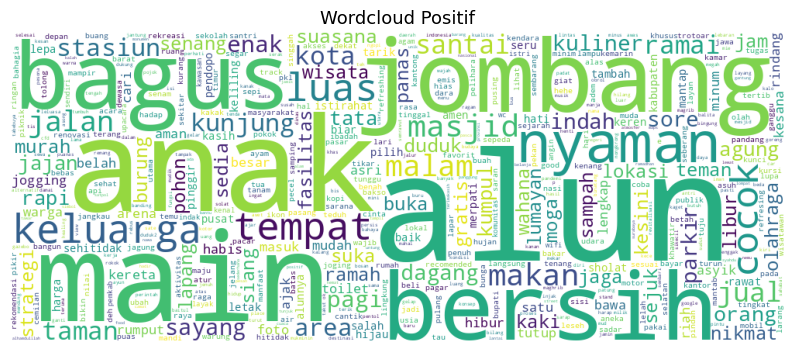

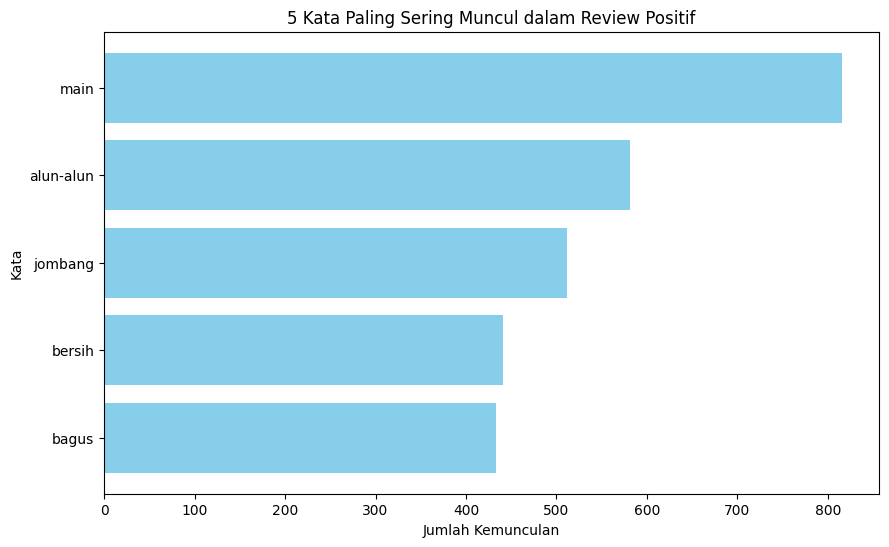

In [24]:
#dilihat perkata sentimen negatif dan positif terkesan sama, mari kita lihat 3 kata (trigram) -->chat gpt

generate_wordcloud(positive_text,'Wordcloud Positif')

print('')

word_freq(positive_text,'Positif')

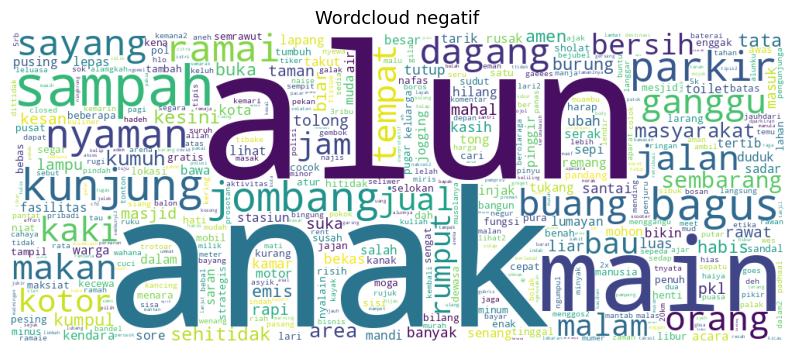

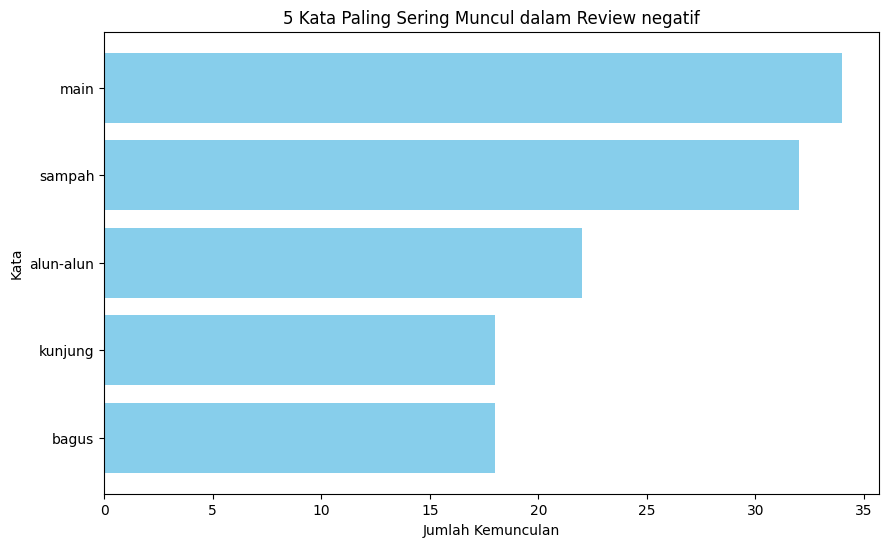

In [25]:
generate_wordcloud(negatif_text,'Wordcloud negatif')
print('')
word_freq(negatif_text,'negatif')

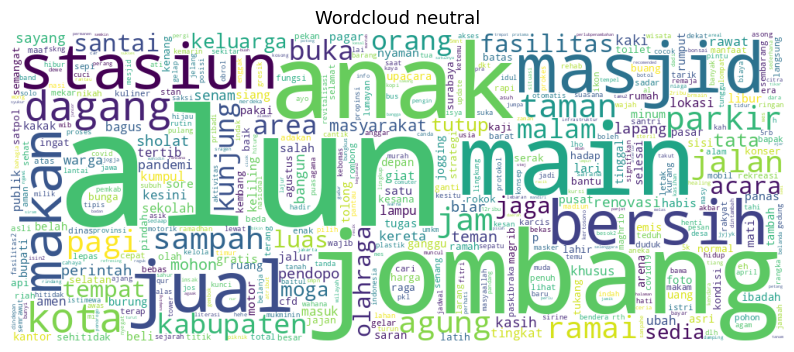

In [26]:
generate_wordcloud(neutral_text,'Wordcloud neutral')

In [27]:
def n_gram(text_data, n): # Modified to accept text_data as input
    n_grams = ngrams(text_data.split(), n) # Use text_data instead of global text
    return n_grams

In [28]:
sentences = []
df_frequency = []
# Function frequency: counts the frequency of the each "n-gram" output
# Parameter grammed: it takes the function "n_gram"s return as value. Briefly, the grammed text.
def frequency(grammed):
    sentences.clear()
    df_frequency.clear()
    freq = nltk.FreqDist(grammed)
    for k, v in freq.items():
        sentences.append(k)                     # Sentences is a list, stores the grams(ignores duplicates)
        df_frequency.append(v)                  # df_frequency is a list, stores the frequency of grams

In [29]:
# Function create_plot: it creates a plot for given grams
# Parameter num: it's a number to send it to "n_gram" function
# Parameter text_data: the combined text data to analyze
def create_plot(num, text_data): # Modified to accept text_data
    frequency(n_gram(text_data, num)) # Send text_data and num parameter to "n_gram func." and send the result to "frequency func."

    gram_frame = pd.DataFrame(sentences)       # gram_frame is the data frame to store grams and freq.

    gram_frame['frequencies'] = df_frequency
    if num == 2:
        gram_frame.columns = ['first', 'second', 'frequencies']
    if num == 3:
        gram_frame.columns = ['first', 'second', 'third', 'frequencies']

    gram_frame.sort_values("frequencies", axis=0, ascending=False, inplace=True, na_position='last')

    gram_frame = gram_frame.head(20)            # Only take the top 20 of gram_frame

    total = sum(df_frequency)

    gram_frame["ratio"] = gram_frame['frequencies'].div(total)   # Additional, ratio is added

    plt.rcdefaults()
    fig, ax = plt.subplots()

    if num == 2:
        grams = gram_frame["first"] + " " + gram_frame["second"]
    if num == 3:
        grams = gram_frame["first"] + " " + gram_frame["second"] + " " + gram_frame["third"]

    # Create plot
    y_pos = np.arange(len(grams))
    performance = gram_frame["frequencies"]

    ax.barh(y_pos, performance)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(grams)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Frequency')
    ax.set_title(f'{num}-grams') # Changed title to be more informative

    plt.show()
    display(gram_frame)

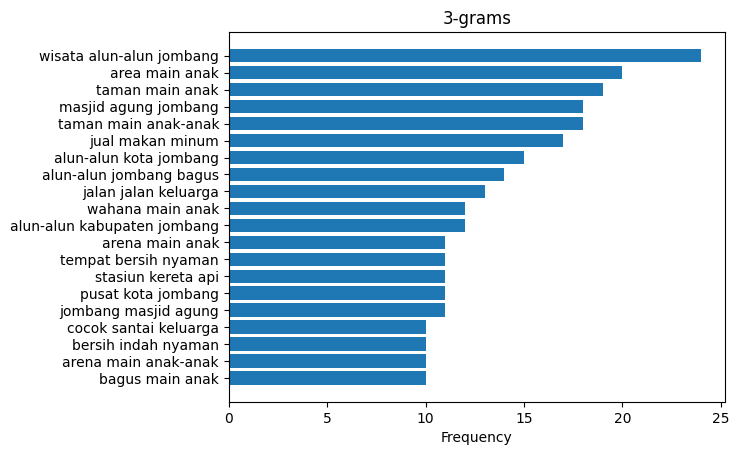

,first,second,third,frequencies,ratio
937,wisata,alun-alun,jombang,24,0.001265
628,area,main,anak,20,0.001054
288,taman,main,anak,19,0.001001
1410,masjid,agung,jombang,18,0.000948
2024,taman,main,anak-anak,18,0.000948
1327,jual,makan,minum,17,0.000896
1913,alun-alun,kota,jombang,15,0.000790
209,alun-alun,jombang,bagus,14,0.000738
3253,jalan,jalan,keluarga,13,0.000685
492,wahana,main,anak,12,0.000632


In [30]:
create_plot(3, positive_text) # Pass positive_text to create_plot

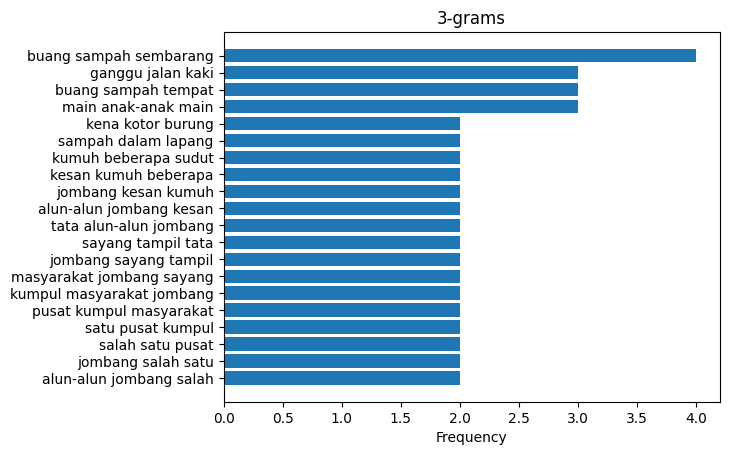

,first,second,third,frequencies,ratio
177,buang,sampah,sembarang,4,0.003484
572,ganggu,jalan,kaki,3,0.002613
186,buang,sampah,tempat,3,0.002613
461,main,anak-anak,main,3,0.002613
25,kena,kotor,burung,2,0.001742
5,sampah,dalam,lapang,2,0.001742
94,kumuh,beberapa,sudut,2,0.001742
93,kesan,kumuh,beberapa,2,0.001742
92,jombang,kesan,kumuh,2,0.001742
91,alun-alun,jombang,kesan,2,0.001742


In [31]:
create_plot(3, negatif_text)

In [32]:
# Instalasi BERTopic
!pip install bertopic

# Instalasi sentence-transformers (jika belum ada)
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 5.5 MB/s eta 0:00:00


In [33]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
topic_model = BERTopic(embedding_model=embedding_model,language='indonesian')
topics, probs = topic_model.fit_transform(df_sentiment['ulasan_stemming'])

/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [34]:
topic_info = topic_model.get_topic_info()
topic_info.head()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,612,-1_anak_main_alun_bagus,"[anak, main, alun, bagus, jombang, jalan, keluarga, kunjung, bersih, nyaman]","[alun-alun jombang bagus sarana main anak buka anak-anak suka main tempat kota kota jombang moga indah taman main, bagus cocok anak-anak main tempat luas, alun-alun bagus anak-anak nyaman main]"
1,0,298,0_masjid_agung_stasiun_alun,"[masjid, agung, stasiun, alun, jombang, sholat, strategis, makan, lokasi, luas]","[bagus masjid stasiun main, alun-alun kota jombang masjid agung bagus besar, alun-alun jombang bagus main besar main anak-anak stasiun kereta masjid agung]"
2,1,162,1_jual_makan_ramai_harga,"[jual, makan, ramai, harga, malam, kuliner, jajan, alun, murah, enak]","[hibur warga jombang murah riah sore malam jual makan cocok cari makan malam, bagus orang jual kuliner harga murah, malam ramai sayang orang jual jajan]"
3,2,69,2_anak_main_bersih_jaga,"[anak, main, bersih, jaga, nyaman, aman, tempat, cocok, area, ajak]","[bersih cocok main anak-anak, bersih main anak, main jaga bersih anak-anak nyaman main]"
4,3,68,3_parkir_motor_mobil_kendara,"[parkir, motor, mobil, kendara, jalan, area, masuk, bagus, tata, luas]","[olahraga bersih parkir luas nyaman, bagus bersih jaga parkir ramai, bagus area parkir malam]"


In [35]:
topic_info['Representation'][:8]

,Representation
0,"[anak, main, alun, bagus, jombang, jalan, keluarga, kunjung, bersih, nyaman]"
1,"[masjid, agung, stasiun, alun, jombang, sholat, strategis, makan, lokasi, luas]"
2,"[jual, makan, ramai, harga, malam, kuliner, jajan, alun, murah, enak]"
3,"[anak, main, bersih, jaga, nyaman, aman, tempat, cocok, area, ajak]"
4,"[parkir, motor, mobil, kendara, jalan, area, masuk, bagus, tata, luas]"
5,"[malam, lampu, sore, mati, terang, suasana, remang, bagus, gelap, mojok]"
6,"[taman, main, olahraga, duduk, area, bagus, pusat, ingat, foto, luas]"
7,"[toilet, kamar, mandi, wc, bersih, bayar, luas, masjid, fasilitas, alun]"


In [40]:
aspects=['area','main','jombang','alunalun','fasilitas','parkir','keluarga','sampah','bersih','tempat','suasana','lokasi','kota']

In [41]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("yangheng/deberta-v3-base-absa-v1.1")
model = AutoModelForSequenceClassification.from_pretrained("yangheng/deberta-v3-base-absa-v1.1")

from transformers import pipeline
pipe = pipeline("text-classification", model=model,tokenizer=tokenizer)

tokenizer_config.json:   0%|          | 0.00/372 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/18.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/738M [00:00<?, ?B/s]

Device set to use cpu


In [42]:
def extract_aspects(text):
    found = [a for a in aspects if a in text.lower()]
    return found if found else []


In [43]:
def get_aspect_sentiment(text):
    aspek_ditemukan = extract_aspects(text)
    hasil = []

    for asp in aspek_ditemukan:
        sent = pipe(text, text_pair=asp)
        hasil.append({
            "aspect": asp,
            "sentiment": sent[0]["label"]
        })
    return hasil


In [44]:
from tqdm import tqdm
tqdm.pandas()
df_sentiment["aspect_sentiment"] = df_sentiment["ulasan_stemming"].progress_apply(get_aspect_sentiment)


100%|██████████| 2120/2120 [27:46<00:00,  1.27it/s]


In [45]:
df_sentiment.head()

,ulasan_clean,ulasan_stemming,w11wo_model_sentimen,aspect_sentiment
0,lokasi strategis dekat dari stasiun jombang dekat dari lapas dekat dari klinik nakes battra alunalun nya cocok buat workout atau sekedar cari suasana baru buat piknik bersama keluarga juga baik ada kakak abang penjual jajanan juga di pinggir buat jogging muter 7 keliling juga baik ada lapangan sepertinya biasa dipakai buat upacara,lokasi strategis stasiun jombang lapas klinik nakes battra alun-alun cocok workout cari suasana piknik keluarga kakak abang jual jajan pinggir jogging muter 7 keliling lapang pakai upacara,positive,"[{'aspect': 'jombang', 'sentiment': 'Positive'}, {'aspect': 'keluarga', 'sentiment': 'Positive'}, {'aspect': 'suasana', 'sentiment': 'Positive'}, {'aspect': 'lokasi', 'sentiment': 'Positive'}]"
1,bisa ke alunalun kapan saja tapi tempat bermainnya tidak buka setiap saat ya ada jam jam tertentu lain akun jombang sekarang bersih bisa buat tempat olahraga seperti lari atau jalanan kaki bisa juga hanya duduk duduk sambil lihatin anak main jangan membawa makanan ke area main ya biar tetap bersih,alun-alun main buka jam jam akun jombang bersih olahraga lari jalan kaki duduk duduk lihatin anak main bawa makan area main biar bersih,positive,"[{'aspect': 'area', 'sentiment': 'Neutral'}, {'aspect': 'main', 'sentiment': 'Neutral'}, {'aspect': 'jombang', 'sentiment': 'Neutral'}, {'aspect': 'bersih', 'sentiment': 'Neutral'}]"
2,alunalun sekarang vibesnya lebih positif tiap pagi dan sore bisa jadi tempat untuk olahraga jalan atau lari ada tempat bermain khusus anak juga hanya saja tempatnya banyak nyamuk kurang nyaman untuk beristirahat lama,alun-alun vibesnya positif pagi sore olahraga jalan lari main khusus anak tempat nyamuk nyaman istirahat,positive,"[{'aspect': 'main', 'sentiment': 'Positive'}, {'aspect': 'tempat', 'sentiment': 'Positive'}]"
3,alunalun ini berada dekat dengan stasiun jombang dan masjid agung baitul mukminin disini terdapat taman bermain yang ramah untuk bermain anakanak untuk jogging dihari minggu pagi juga bisa,alun-alun stasiun jombang masjid agung baitul mukminin taman main ramah main anak-anak jogging hari pagi,positive,"[{'aspect': 'main', 'sentiment': 'Neutral'}, {'aspect': 'jombang', 'sentiment': 'Neutral'}]"
4,salah satu area publik yang layak buat warga jombang cocok untuk tempat bermain anakanak,salah satu area publik layak warga jombang cocok main anak-anak,positive,"[{'aspect': 'area', 'sentiment': 'Positive'}, {'aspect': 'main', 'sentiment': 'Neutral'}, {'aspect': 'jombang', 'sentiment': 'Neutral'}]"


In [46]:
# expand hasil analisis jadi baris terpisah
rows = []
for i, row in df_sentiment.iterrows():
    for asp in row["aspect_sentiment"]:
        rows.append({
            "ulasan_clean": row["ulasan_clean"],
            "ulasan_stemming": row["ulasan_stemming"],
            "w11wo_model_sentimen": row["w11wo_model_sentimen"],
            "aspect": asp["aspect"],
            "sentiment": asp["sentiment"]
        })

df_result = pd.DataFrame(rows)



In [54]:
df_result['ulasan_clean'] = df_result['ulasan_clean'].str.replace('anakanak', 'anak-anak')
df_result['ulasan_clean'] = df_result['ulasan_clean'].str.replace('alunalun', 'alun-alun')

In [55]:
df_result.iloc[1145:1165]

,ulasan_clean,ulasan_stemming,w11wo_model_sentimen,aspect,sentiment
1145,minggu pagi di alun-alun jombang ada banyak orang jualan makanan mainan juga ada yang bikin seru ada komunitas cinta binatang langka di sana kita bisa mengenalkan ke anak-anak binatang yang jarang kita temui bisa juga foto bersama binatangnya gratis,pagi alun-alun jombang orang jual makan main bikin seru komunitas cinta binatang langka kenal anak-anak binatang temu foto binatang gratis,positive,jombang,Neutral
1146,bersih asri pokoknya sekarang alun-alun jombang pebih terlihat alami maju terus jombang kalau bisa contoh alun-alun kota lain ya biar alun-alun lebih indah,bersih asri pokok alun-alun jombang pebih alami maju jombang alun-alun kota biar alun-alun indah,positive,jombang,Neutral
1147,bersih asri pokoknya sekarang alun-alun jombang pebih terlihat alami maju terus jombang kalau bisa contoh alun-alun kota lain ya biar alun-alun lebih indah,bersih asri pokok alun-alun jombang pebih alami maju jombang alun-alun kota biar alun-alun indah,positive,bersih,Neutral
1148,bersih asri pokoknya sekarang alun-alun jombang pebih terlihat alami maju terus jombang kalau bisa contoh alun-alun kota lain ya biar alun-alun lebih indah,bersih asri pokok alun-alun jombang pebih alami maju jombang alun-alun kota biar alun-alun indah,positive,kota,Neutral
1149,bagus ada tempat main yang nenyenangkan,bagus main nenyenangkan,positive,main,Neutral
1150,bersiih rapi dan nyaman buat olah raga jogging dan bermain untuk anak-anak sip pokok e,bersiih rapi nyaman olah raga jogging main anak-anak sip pokok e,positive,main,Positive
1151,tempanya santai bersih nyaman untuk sekedar jalan jalan ataupun olahraga pagi maupun sore ada beberapa penjual makanan dipagi hari jadi tidak perlu khawatir kalau sampai dialun-alun dipagi hari,tempa santai bersih nyaman jalan jalan olahraga pagi sore jual makan pagi khawatir dialun-alun pagi,positive,bersih,Positive
1152,tempatnya sangat luas kbersihannya terjaga trsedia tong sampah di setiap pinggir jlan sekitar alun untuk membuang smpah,tempat luas kbersihannya jaga trsedia tong sampah pinggir jlan alun buang smpah,positive,sampah,Positive
1153,tempatnya sangat luas kbersihannya terjaga trsedia tong sampah di setiap pinggir jlan sekitar alun untuk membuang smpah,tempat luas kbersihannya jaga trsedia tong sampah pinggir jlan alun buang smpah,positive,bersih,Positive
1154,tempatnya sangat luas kbersihannya terjaga trsedia tong sampah di setiap pinggir jlan sekitar alun untuk membuang smpah,tempat luas kbersihannya jaga trsedia tong sampah pinggir jlan alun buang smpah,positive,tempat,Positive


In [47]:
insight = df_result.groupby(["aspect", "sentiment"]).size().reset_index(name="count")
insight.sort_values(["aspect", "count"], ascending=[True, False])


,aspect,sentiment,count
0,alunalun,Neutral,1
3,area,Positive,74
2,area,Neutral,60
1,area,Negative,12
6,bersih,Positive,296
5,bersih,Neutral,129
4,bersih,Negative,30
9,fasilitas,Positive,57
8,fasilitas,Neutral,22
7,fasilitas,Negative,3
